In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
import pandas as pd

Load the data

In [ ]:
my_data = pd.read_csv('/content/winequality-red.csv')

Drop duplicate rows

In [ ]:
my_data = my_data.drop_duplicates()

handle null values

In [ ]:
null_threshold = 0.7


def drop_columns_with_high_null_percentage(df, threshold=0.7):
    # Calculate the null percentage for each column
    null_percentage = df.isnull().mean()

    # Identify columns with null percentage exceeding the threshold
    columns_to_drop = null_percentage[null_percentage > threshold].index.tolist()

    # Drop the identified columns
    df_dropped = df.drop(columns=columns_to_drop)

    for column in df_dropped.columns:
        if df_dropped[column].dtype == 'object':
            # For categorical columns, fill with the mode
            mode_value = df_dropped[column].mode()[0]
            df_dropped[column].fillna(mode_value, inplace=True)
        else:
            # For numeric columns, fill with the mean
            mean_value = df_dropped[column].mean()
            df_dropped[column].fillna(mean_value, inplace=True)

    return df_dropped

my_data = drop_columns_with_high_null_percentage(my_data, null_threshold)

Define numerical columns

In [ ]:
numerical_columns = my_data.select_dtypes(include=['int64', 'float64']).columns

handle outliers


In [ ]:
for i in numerical_columns:
    Q1 :float = my_data[i].quantile(0.25)
    Q3:float = my_data[i].quantile(0.75)
    IQR = Q3 - Q1
    up_limit:float = Q3 + 1.5 * IQR
    low_limit:float = Q1 - 1.5 * IQR
    my_data.loc[my_data[i] > up_limit, i] :float= up_limit
    my_data.loc[my_data[i] < low_limit, i] :float= low_limit

Separate features and target variable

In [ ]:
x = my_data.drop(columns=['quality'])
y = my_data['quality']

Split the data into training and test sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=42)

Feature scaling using StandardScaler

In [ ]:
numerical_columns = x_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
x_train[numerical_columns] = scaler.fit_transform(x_train[numerical_columns])
x_test[numerical_columns] = scaler.transform(x_test[numerical_columns])

Feature selection

In [ ]:
k_best_selector = SelectKBest(score_func=f_regression, k=8)
x_train = k_best_selector.fit_transform(x_train, y_train)
x_test = k_best_selector.transform(x_test)

Polynomial feature expansion

In [ ]:
#
degree = 2  # Adjust the degree as needed
poly_features = PolynomialFeatures(degree=degree)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

Model training and evaluation

In [ ]:
model = LinearRegression()
model.fit(x_train_poly, y_train)
y_pred = model.predict(x_test_poly)
mse = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test,y_pred)

Print the results

Mean Squared Error: 0.3471178686740631
Mean Absolute Error: 0.46503359810477507


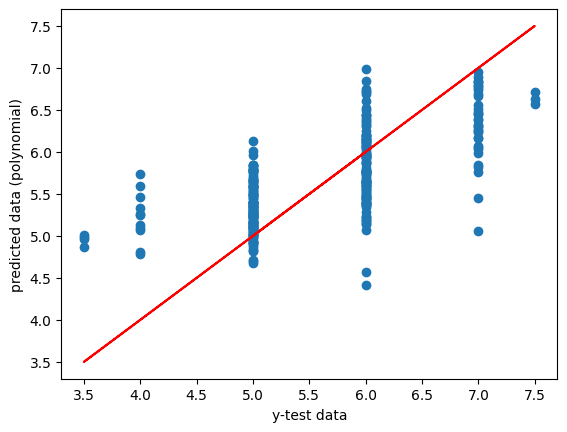

In [ ]:
print(f'Mean Squared Error: {mse}')

print(f'Mean Absolute Error: {MAE}')

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('y-test data')
plt.ylabel('predicted data (polynomial)')
plt.show()